In [119]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Import borough dataframe made in previous part

In [95]:
torontohood = pd.read_csv('torontohoodwlatlong.csv')
torontohood.drop(columns=['Unnamed: 0'],inplace=True)

In [96]:
torontohood

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [97]:
CLIENT_ID = 'YOR2EK5MQWPS4OMKK42RN1EN15GN0PQFEF44AAGL4LX3L40F'
CLIENT_SECRET = 'AYTRQR1PS2RFKWL5LAAT3CVTYQ1DMOOQQIS5P2A5TNLCMK2S'
VERSION = '20180605'

In [98]:
torontohood['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

### Limit Borough to Toronto

In [99]:
toronto_data = torontohood.loc[torontohood['Borough'].isin(['Downtown Toronto','Central Toronto','West Toronto','East Toronto'])].reset_index(drop=True)
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


### Testing Foursquare API with one neighborhodd before applying code to all data

In [100]:
LIMIT = 100
radius=500
lat = toronto_data.iloc[1,3]
lng = toronto_data.iloc[1,4]
url =  'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1fb9cc9df0a936eabafcc2'},
 'response': {'headerLocation': 'Greektown',
  'headerFullLocation': 'Greektown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 42,
  'suggestedBounds': {'ne': {'lat': 43.6840571045, 'lng': -79.34597738331301},
   'sw': {'lat': 43.675057095499994, 'lng': -79.35839861668698}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5102df8df13673cd7084ac39',
       'name': 'MenEssentials',
       'location': {'address': '412 Danforth Ave.',
        'crossStreet': 'Near Danforth and Chester',
        'lat': 43.677820068604575,
        'lng': -79.35126543045044,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.677820068604575,
          'lng': -79.35126543045044}],
      

In [101]:
venues = results['response']['groups'][0]['items']
name = results['response']['headerLocation']
nearby_venues1 = json_normalize(venues)
nearby_venues1
print(name)
nearby_venues1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


Greektown


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-5102df8df13673cd7084ac39-0,0,"[{'summary': 'This spot is popular', 'type': '...",5102df8df13673cd7084ac39,MenEssentials,412 Danforth Ave.,Near Danforth and Chester,43.677820,-79.351265,"[{'label': 'display', 'lat': 43.67782006860457...",...,CA,Toronto,ON,Canada,[412 Danforth Ave. (Near Danforth and Chester)...,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",0,[],50073247,NaN
1,e-0-4bce4183ef10952197da8386-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bce4183ef10952197da8386,Pantheon,407 Danforth Ave.,at Chester Ave.,43.677621,-79.351434,"[{'label': 'display', 'lat': 43.67762124481265...",...,CA,Toronto,ON,Canada,"[407 Danforth Ave. (at Chester Ave.), Toronto ...","[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",0,[],NaN,NaN
2,e-0-4e3dbb5e45dd68e3273e03b7-2,0,"[{'summary': 'This spot is popular', 'type': '...",4e3dbb5e45dd68e3273e03b7,Cafe Fiorentina,463 Danforth Ave,Logan Ave,43.677743,-79.350115,"[{'label': 'display', 'lat': 43.677743, 'lng':...",...,CA,Toronto,ON,Canada,"[463 Danforth Ave (Logan Ave), Toronto ON M4K ...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,NaN
3,e-0-4dc72844d22dafda2fcf75e6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4dc72844d22dafda2fcf75e6,Dolce Gelato,414 Danforth Ave,NaN,43.677773,-79.351187,"[{'label': 'display', 'lat': 43.67777299845061...",...,CA,Toronto,ON,Canada,"[414 Danforth Ave, Toronto ON M4K 1P3, Canada]","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
4,e-0-541ed0a3498e7ff705517bcd-4,0,"[{'summary': 'This spot is popular', 'type': '...",541ed0a3498e7ff705517bcd,Louis Cifer Brew Works,417 Danforth Ave,at Chester Ave,43.677663,-79.351313,"[{'label': 'display', 'lat': 43.67766274535999...",...,CA,Toronto,ON,Canada,"[417 Danforth Ave (at Chester Ave), Toronto ON...","[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],95245706,NaN
5,e-0-57799e91498e189817c91ead-5,0,"[{'summary': 'This spot is popular', 'type': '...",57799e91498e189817c91ead,La Diperie,372 Danforth Avenue,NaN,43.677702,-79.352265,"[{'label': 'display', 'lat': 43.677702, 'lng':...",...,CA,Toronto,ON,Canada,"[372 Danforth Avenue, Toronto ON M4K 1N8, Canada]","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
6,e-0-4b677c35f964a520c7512be3-6,0,"[{'summary': 'This spot is popular', 'type': '...",4b677c35f964a520c7512be3,Moksha Yoga Danforth,372 Danforth Ave,at Chester Ave,43.677622,-79.352116,"[{'label': 'display', 'lat': 43.67762174479883...",...,CA,Toronto,ON,Canada,"[372 Danforth Ave (at Chester Ave), Toronto ON...","[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",0,[],NaN,NaN
7,e-0-4bd1db4e046076b0f1a57271-7,0,"[{'summary': 'This spot is popular', 'type': '...",4bd1db4e046076b0f1a57271,The Big Carrot Organic Juice Bar,348 Danforth Ave,Hampton Avenue,43.677438,-79.352683,"[{'label': 'display', 'lat': 43.677438, 'lng':...",...,CA,Toronto,ON,Canada,"[348 Danforth Ave (Hampton Avenue), Toronto ON...","[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",0,[],NaN,NaN
8,e-0-4afdfadff964a520a52c22e3-8,0,"[{'summary': 'This spot is popular', 'type': '...",4afdfadff964a520a52c22e3,Mezes,456 Danforth Ave,at Logan Ave.,43.677962,-79.350196,"[{'label': 'display', 'lat': 43.6779622615441,...",...,CA,Toronto,ON,Canada,"[456 Danforth Ave (at Logan Ave.), Toronto ON ...","[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",0,[],NaN,NaN
9,e-0-4aeb268bf964a52006bf21e3-9,0,"[{'summary': 'This spot is popular', 'type': '...",4aeb268bf964a52006bf21e3,Messini Authentic Gyros,445 Danforth Ave,at Logan Ave,43.677704,-79.350480,"[{'label': 'display', 'lat': 43.677704, 'l

In [102]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]
nearby_venues1['Neighborhood'] = name

In [103]:
nearby_venues1

,venue.name,venue.categories,venue.location.lat,venue.location.lng,Neighborhood
0,MenEssentials,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.677820,-79.351265,Greektown
1,Pantheon,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",43.677621,-79.351434,Greektown
2,Cafe Fiorentina,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",43.677743,-79.350115,Greektown
3,Dolce Gelato,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",43.677773,-79.351187,Greektown
4,Louis Cifer Brew Works,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",43.677663,-79.351313,Greektown
5,La Diperie,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",43.677702,-79.352265,Greektown
6,Moksha Yoga Danforth,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",43.677622,-79.352116,Greektown
7,The Big Carrot Organic Juice Bar,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",43.677438,-79.352683,Greektown
8,Mezes,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",43.677962,-79.350196,Greektown
9,Messini Authentic Gyros,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",43.677704,-79.350480,Greektown


### Function to get name from venue.category

In [104]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [105]:
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

In [106]:
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

nearby_venues1.head()

,name,categories,lat,lng,Neighborhood
0,MenEssentials,Cosmetics Shop,43.677820,-79.351265,Greektown
1,Pantheon,Greek Restaurant,43.677621,-79.351434,Greektown
2,Cafe Fiorentina,Italian Restaurant,43.677743,-79.350115,Greektown
3,Dolce Gelato,Ice Cream Shop,43.677773,-79.351187,Greektown
4,Louis Cifer Brew Works,Brewery,43.677663,-79.351313,Greektown


### Function to apply same process to all neighborhoods

In [107]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT, radius=500):
    count = 0
    for name, laty, lngy in zip(names, latitudes, longitudes):
        venues_list = 0
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            laty, 
            lngy, 
            radius, 
            LIMIT)
               
        results = requests.get(url).json()
        venuesn = results['response']['groups'][0]['items']
        venues_list = pd.json_normalize(venuesn)
        venues_list['Neighborhood'] = name
        venues_list['Neighborhood Latitude'] = laty
        venues_list['Neighborhood Longitude'] = lngy
        # return only relevant information for each nearby venue
        filtered_columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        if count == 0:
            nearby_venues = venues_list.loc[:,filtered_columns]
        else:
            nearby_venues = nearby_venues.append([venues_list.loc[:,filtered_columns]])
        count = count + 1
        
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    return(nearby_venues)

In [108]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],latitudes=toronto_data['Latitude'],longitudes=toronto_data['Longitude'],LIMIT=100)

In [109]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,name,categories,lat,lng
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,Pub,43.679181,-79.297215
3,The Beaches,43.676357,-79.293031,Upper Beaches,Neighborhood,43.680563,-79.292869
0,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,Cosmetics Shop,43.677820,-79.351265
...,...,...,...,...,...,...,...
11,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,Light Rail Station,43.664908,-79.322560
12,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,Park,43.664702,-79.319898
13,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ten Spot,Spa,43.664815,-79.324213
14,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Stop #03049,Light Rail Station,43.664470,-79.325145


### Dataframe showing venue categories for all neighborhoods

In [110]:
toronto_venues.reset_index(drop=True)
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,name,categories,lat,lng
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,Pub,43.679181,-79.297215
3,The Beaches,43.676357,-79.293031,Upper Beaches,Neighborhood,43.680563,-79.292869
0,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,Cosmetics Shop,43.677820,-79.351265
...,...,...,...,...,...,...,...
11,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,Light Rail Station,43.664908,-79.322560
12,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,Park,43.664702,-79.319898
13,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ten Spot,Spa,43.664815,-79.324213
14,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Stop #03049,Light Rail Station,43.664470,-79.325145


In [111]:
toronto_venues.reset_index(drop=True,inplace=True)
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,name,categories,lat,lng
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,Pub,43.679181,-79.297215
3,The Beaches,43.676357,-79.293031,Upper Beaches,Neighborhood,43.680563,-79.292869
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,Cosmetics Shop,43.677820,-79.351265
...,...,...,...,...,...,...,...
1637,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,Light Rail Station,43.664908,-79.322560
1638,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,Park,43.664702,-79.319898
1639,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ten Spot,Spa,43.664815,-79.324213
1640,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Stop #03049,Light Rail Station,43.664470,-79.325145


### Removing "neighborhood" category in categories since it can be redundant

In [112]:
toronto_venues = toronto_venues[toronto_venues.categories !='Neighborhood']
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,name,categories,lat,lng
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,Pub,43.679181,-79.297215
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,Cosmetics Shop,43.677820,-79.351265
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,Greek Restaurant,43.677621,-79.351434
...,...,...,...,...,...,...,...
1637,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,Light Rail Station,43.664908,-79.322560
1638,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,Park,43.664702,-79.319898
1639,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ten Spot,Spa,43.664815,-79.324213
1640,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Stop #03049,Light Rail Station,43.664470,-79.325145


### One hot encoding for clustering

In [113]:
toronto_onehot = pd.get_dummies(toronto_venues[['categories']],prefix="",prefix_sep="")
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
fixed_columns = list(toronto_onehot.columns[:])
fixed_columns.remove('Neighborhood')
fixed_columns.insert(0,'Neighborhood')
toronto_onehot = toronto_onehot[fixed_columns]

In [114]:
toronto_onehot

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1638,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1640,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean()
toronto_grouped['Neighborhood'] = toronto_grouped.index
toronto_grouped = toronto_grouped[fixed_columns]
toronto_grouped.reset_index(drop=True,inplace=True)
toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.016667,0.000000,...,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.015873,0.000000,0.000000,0.015873
5,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.013333,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.013333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026667
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Function for sorting most common venue cateogires in descending frequency

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Taking top 5 common venues categories in each neighborhood

In [117]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Restaurant,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Café,Performing Arts Venue,Bakery,Breakfast Spot,Coffee Shop
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Skate Park,Fast Food Restaurant,Auto Workshop,Burrito Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Airport
4,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Department Store


### Checking adequate cluster numbers by elbow method

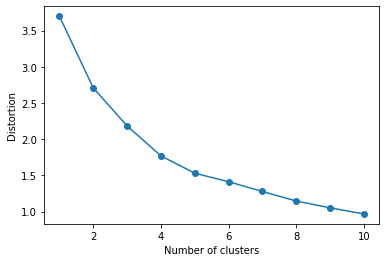

In [127]:
import matplotlib.pyplot as plt
toronto_grouped_clustering = toronto_grouped.drop(columns=['Neighborhood'])

distortions = []

for i  in range(1,11):            
    km = KMeans(n_clusters=i,
                init='k-means++',   
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(toronto_grouped_clustering)                       
    distortions.append(km.inertia_) 

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### CLustering

In [129]:
toronto_grouped_clustering = toronto_grouped.drop(columns=['Neighborhood'])     
km = KMeans(n_clusters=5,
            init='k-means++',   
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(toronto_grouped_clustering)
km.labels_[0:38]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 3, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [130]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', km.labels_)

toronto_merged = toronto_data

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Trail,Health Food Store,Pub,Dog Run,Department Store
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Restaurant,Ice Cream Shop
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Food & Drink Shop,Liquor Store,Burrito Place,Sandwich Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Bakery,Brewery
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4,Park,Swim School,Bus Line,Yoga Studio,Department Store


### Visualise clusters

In [131]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [132]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### There is a one big cluster and others seem to be a minority.Majority of Toronto seems to be dominated by the big red cluster. The big cluster mostly contains restaurants and food shops. Most of these are from Downtown Toronto, and it appears to be a cluster of urban food venues.

In [133]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,East Toronto,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Restaurant,Ice Cream Shop
2,East Toronto,0,Park,Food & Drink Shop,Liquor Store,Burrito Place,Sandwich Place
3,East Toronto,0,Café,Coffee Shop,American Restaurant,Bakery,Brewery
5,Central Toronto,0,Park,Department Store,Breakfast Spot,Gym / Fitness Center,Food & Drink Shop
6,Central Toronto,0,Coffee Shop,Clothing Store,Yoga Studio,Spa,Café
7,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Sushi Restaurant,Coffee Shop
9,Central Toronto,0,Pub,Coffee Shop,American Restaurant,Sushi Restaurant,Bagel Shop
11,Downtown Toronto,0,Coffee Shop,Pizza Place,Café,Italian Restaurant,Restaurant
12,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant
13,Downtown Toronto,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot


### While cluster 1 seems straightforward, cluster 2 can be a more ambiguous one. could be described as a suburb of central Toronto.

In [134]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,Central Toronto,1,Garden,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store


### Above description may also apply to cluster 3

In [135]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,East Toronto,2,Trail,Health Food Store,Pub,Dog Run,Department Store


### Cluster 4 and 5 also looks pretty similar, as both of them have Park as the most common venue. Many sports related venues are contained in these clusters, so these can be described as leisure clusters.

In [136]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Central Toronto,3,Park,Trail,Tennis Court,Restaurant,Colombian Restaurant
10,Downtown Toronto,3,Park,Playground,Trail,Yoga Studio,Dance Studio
23,Central Toronto,3,Park,Jewelry Store,Trail,Sushi Restaurant,Deli / Bodega


In [137]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Central Toronto,4,Park,Swim School,Bus Line,Yoga Studio,Department Store
